# SD Simulations with Submission System


## Imports

In [1]:
import os
#for analysis
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import pygromos
from pygromos.files.gromos_system import Gromos_System
from pygromos.files.blocks import imd_blocks
from pygromos.data.simulation_parameters_templates import template_emin

/home/bschroed/Documents/code/PyGromosTools/pygromos/files/blocks/topology_blocks.py:1692: UserWarning: SPECIAL LJ BLOCK IS NOT IMPLEMENTED!
  warnings.warn("SPECIAL LJ BLOCK IS NOT IMPLEMENTED!")


## Input files

In [2]:
root_dir = project_dir = os.path.abspath(os.path.dirname(pygromos.__file__)+"/../examples/example_files/SD_Simulation")
root_in_dir = root_dir+"/SD_input"
cnf_path = root_in_dir+"/6J29_unitedatom_optimised_geometry.cnf"
top_path = root_in_dir + "/6J29.top"
sys_name = "6J29"

#External imd_changes:
grom_system = Gromos_System(in_cnf_path=cnf_path, in_top_path=top_path, in_imd_path=template_emin,
                            system_name=sys_name, work_folder=root_in_dir)

grom_system.cnf.add_empty_box()




	CHECK dependencies

Check /home/bschroed/Documents/code/PyGromosTools/examples/example_files/SD_Simulation/SD_input
Check /home/bschroed/Documents/code/PyGromosTools/pygromos/data/simulation_parameters_templates/emin.imd
Check /home/bschroed/Documents/code/PyGromosTools/examples/example_files/SD_Simulation/SD_input/6J29.top
Check /home/bschroed/Documents/code/PyGromosTools/examples/example_files/SD_Simulation/SD_input/6J29_unitedatom_optimised_geometry.cnf
/home/bschroed/Documents/code/PyGromosTools/examples/example_files/SD_Simulation/SD_input
/home/bschroed/Documents/code/PyGromosTools/pygromos/data/simulation_parameters_templates/emin.imd
/home/bschroed/Documents/code/PyGromosTools/examples/example_files/SD_Simulation/SD_input/6J29.top
/home/bschroed/Documents/code/PyGromosTools/examples/example_files/SD_Simulation/SD_input/6J29_unitedatom_optimised_geometry.cnf
All dependencies are correct! 


Parsing File:  imd
Parsing File:  top
Parsing File:  cnf


## RUN Emin

In [3]:
from pygromos.hpc_queuing.submission_systems.local import LOCAL as subSystem
from pygromos.simulations.modules.preset_simulation_modules import emin
step_name  = "a_vacuum_emin"

#Some special adaptation
grom_system.imd.BOUNDCOND.NTB =0
grom_system.imd.BOUNDCOND.NDFMIN = 0
grom_system.imd.WRITETRAJ = imd_blocks.WRITETRAJ()
grom_system.imd.WRITETRAJ.NTWX = 100
grom_system.imd.WRITETRAJ.NTWE = 100
grom_system.adapt_imd()

In [4]:
grom_system.save(root_dir+"/test.obj", safe=False)

'/home/bschroed/Documents/code/PyGromosTools/examples/example_files/SD_Simulation/test.obj'

In [5]:
grom_system = Gromos_System.load(root_dir+"/test.obj")

In [6]:
grom_system.solute_info._asdict()

OrderedDict([('names', ['6J29']),
             ('number', 1),
             ('positions', [1]),
             ('number_of_atoms', 27)])

In [7]:
emin_gromos_system, jobID = emin(in_gromos_system=grom_system, project_dir=project_dir,
                          step_name=step_name, submission_system=subSystem(), in_imd_path=None)
emin_gromos_system




	CHECK dependencies

Check /home/bschroed/Documents/code/PyGromosTools/examples/example_files/SD_Simulation/SD_input/test
/home/bschroed/Documents/code/PyGromosTools/examples/example_files/SD_Simulation/SD_input/test
All dependencies are correct! 


Generate Empty:  imd
Generate Empty:  top
Generate Empty:  cnf
################################################################################

a_vacuum_emin
################################################################################

FOUND RESULT: /home/bschroed/Documents/code/PyGromosTools/examples/example_files/SD_Simulation/a_vacuum_emin/analysis/data/a_vacuum_emin.cnf
 GOING TO SKIPT THIS SUBMISSION!


/home/bschroed/Documents/code/PyGromosTools/pygromos/files/gromos_system/gromos_system.py:128: UserWarning: No data provided to gromos_system
manual work needed
  if verbose: warnings.warn("No data provided to gromos_system\nmanual work needed")



GROMOS SYSTEM: a_vacuum_emin
################################################################################
WORKDIR: /home/bschroed/Documents/code/PyGromosTools/examples/example_files/SD_Simulation/a_vacuum_emin
LAST CHECKPOINT: /home/bschroed/Documents/code/PyGromosTools/examples/example_files/SD_Simulation/test.obj

GromosXX_bin: None
GromosPP_bin: None
FILES: 
	imd: /home/bschroed/Documents/code/PyGromosTools/examples/example_files/SD_Simulation/a_vacuum_emin/a_vacuum_emin.imd
	top: /home/bschroed/Documents/code/PyGromosTools/examples/example_files/SD_Simulation/a_vacuum_emin/a_vacuum_emin.top
	cnf: /home/bschroed/Documents/code/PyGromosTools/examples/example_files/SD_Simulation/a_vacuum_emin/a_vacuum_emin.cnf
FUTURE PROMISE: False
SYSTEM: 
	Solute:	['6J29']  resID: [1]  natoms: 27
	SOLVENT:	[]  nmolecules: 0  natoms: 0



In [8]:
t = emin_gromos_system.solute_info
print(t)

solute_info(names=['6J29'], number=1, positions=[1], number_of_atoms=27)


In [9]:
emin_gromos_system


GROMOS SYSTEM: a_vacuum_emin
################################################################################
WORKDIR: /home/bschroed/Documents/code/PyGromosTools/examples/example_files/SD_Simulation/a_vacuum_emin
LAST CHECKPOINT: /home/bschroed/Documents/code/PyGromosTools/examples/example_files/SD_Simulation/test.obj

GromosXX_bin: None
GromosPP_bin: None
FILES: 
	imd: /home/bschroed/Documents/code/PyGromosTools/examples/example_files/SD_Simulation/a_vacuum_emin/a_vacuum_emin.imd
	top: /home/bschroed/Documents/code/PyGromosTools/examples/example_files/SD_Simulation/a_vacuum_emin/a_vacuum_emin.top
	cnf: /home/bschroed/Documents/code/PyGromosTools/examples/example_files/SD_Simulation/a_vacuum_emin/a_vacuum_emin.cnf
FUTURE PROMISE: False
SYSTEM: 
	Solute:	['6J29']  resID: [1]  natoms: 27
	SOLVENT:	[]  nmolecules: 0  natoms: 0



In [17]:
emin_gromos_system.work_folder+"/analysis/data"

'/home/bschroed/Documents/code/PyGromosTools/examples/example_files/SD_Simulation/a_vacuum_emin'

## RUN SD Simulation

In [ ]:
from pygromos.simulations.modules.preset_simulation_modules import sd

step_name  = "b_vacuum_sd"

sd_gromos_system, jobID  = sd(in_gromos_system=emin_gromos_system, project_dir=project_dir,
                              step_name=step_name, submission_system=subSystem(nmpi=1),
                      equilibration_runs=1, simulation_runs=3)
sd_gromos_system





	CHECK dependencies

Check /home/bschroed/Documents/code/PyGromosTools/examples/example_files/SD_Simulation/a_vacuum_emin/test
/home/bschroed/Documents/code/PyGromosTools/examples/example_files/SD_Simulation/a_vacuum_emin/test
All dependencies are correct! 


Generate Empty:  imd
Generate Empty:  top
Generate Empty:  cnf
################################################################################

b_vacuum_sd
################################################################################

Script:  /home/bschroed/Documents/code/PyGromosTools/pygromos/hpc_queuing/job_scheduling/schedulers/simulation_scheduler.py
################################################################################
Simulation PREPERATION
################################################################################



################################################################################
Simulation Setup:
################################################################################

steps_

## Further Analysis:
Transform the trc into a pdb traj to check it out with pymol :!)

In [12]:
#final analysis dir:
from pygromos.utils import bash

out_ana = project_dir+"/c_ana"
if(not os.path.exists(out_ana)):
    bash.make_folder(out_ana)

In [10]:
from pygromos.files.trajectory.trc import Trc

in_path=project_dir+"/b_vacuum_sd/analysis/data/b_vacuum_sd.trc.h5"

trc = Trc(input_value=in_path)
trc.write_pdb(out_ana+"/sd_traj.pdb", cnf_file=cnf_path)#grom_system.cnf.path)
trc

FileNotFoundError: File /home/bschroed/Documents/code/PyGromosTools/examples/example_files/SD_Simulation/b_vacuum_sd/analysis/data/b_vacuum_sd.trc.h5 does not exist

In [ ]:
from pygromos.files.trajectory.tre import Tre
in_path=project_dir+"/b_vacuum_sd/analysis/data/b_vacuum_sd.tre.h5"

tre = Tre(input_value=in_path)
tre



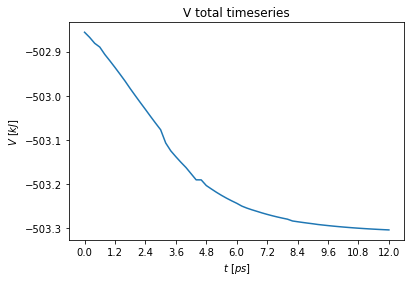

In [15]:
#Plot Potential Energies
V_tot = np.array(list(map(lambda x: x[2], tre.database.totals)))
step = len(tre.database.TIMESTEP_time)//10

plt.plot(tre.database.TIMESTEP_time, V_tot)
plt.xticks(np.round(list(tre.database.TIMESTEP_time[::step]),2))
plt.xlabel("$t~[ps]$")
plt.ylabel("$V~[kJ]$")
plt.title("V total timeseries")
plt.savefig(out_ana+"/potential_energy_timeseries.png")

In [11]:
import os

In [12]:
os.listdir("/home/bschroed/Documents/code/PyGromosTools/examples/example_files/SD_Simulation/a_vacuum_emin/analysis/data/")

['a_vacuum_emin.cnf', 'a_vacuum_emin.trc.h5', 'a_vacuum_emin.tre.h5']

In [13]:
trc = Trc(emin_gromos_system.work_folder+"/analysis/data/a_vacuum_emin.trc.h5")
cnf = emin_gromos_system.cnf

In [14]:
def trc_xyz(cnf):
    xyz_format = "{:<3}\t{:> 3.9f}   {:> 3.9f}   {:> 3.9f}\n"

    atom_types = [a.atomType for a in cnf.POSITION]
    traj = []
    for step, frame in trc.database.iterrows():
        xyz_str = str(len(frame)) + "\n"
        xyz_str += "# Frame "+str(step)+"\n"
        xyz_str += "# exported wit PyGromosTools\n"
        POS_keys = [x for x in frame.index if("POS" in x)]
        for atomID, atom in enumerate(frame[POS_keys]):
            xyz_str+=xyz_format.format(atom_types[atomID], atom[0], atom[1], atom[2])
        traj.append(xyz_str)
    
    return traj
            
traj_pdb = trc_xyz(cnf)

In [15]:
import py3Dmol
view=py3Dmol.view(width=400, height=400)
view.addModel(cnf.get_xyz())
view.setStyle({"stick":{}})
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [18]:
import py3Dmol
traj = trc.get_pdb(cnf)
view=py3Dmol.view(width=400, height=400)
view.addModelsAsFrames(traj)
view.setStyle({'model':-1}, {"stick":{}})
#view.animate({"loop":"forwardAndBackward"})

view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [19]:
import py3Dmol
traj = trc_xyz(cnf)
view=py3Dmol.view(width=400, height=400)
view.addModelsAsFrames(traj)
view.setStyle({'model':-1}, {"stick":{}})
#view.animate({"loop":"forwardAndBackward"})

view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol